<a href="https://colab.research.google.com/github/LokiAndere/After_MIARFID/blob/main/white_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [45]:
adr = r'/content/drive/MyDrive/ght3.png'
img = cv2.imread(adr, cv2.IMREAD_GRAYSCALE)

In [46]:
# in case you want to use exactly my image
# take the printed list and save it as an image
dat = img.tolist()
print(dat)

[[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 2

In [47]:
adr2 = r'/content/drive/MyDrive/ght3-copy.png'
cv2.imwrite(adr2, np.asarray(dat))

True

In [48]:
im = cv2.imread(adr2)

In [ ]:
# draw functions are equivalent. Use the one you understand better

In [49]:
def draw_mpl(im, name = 'origin', colmap = 'gray'):
    fig, ax = plt.subplots(figsize=(12,12), dpi=72)
    ax.set_title(label=name, fontsize=16, color="black")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    plt.imshow(im, cmap=colmap)
    plt.show()

In [50]:
def draw(im, name = 'origin'):
  if len(im.shape) < 3:
    im = cv2.merge([im, im, im])
  fig, ax = plt.subplots(figsize=(12,12), dpi=72)
  ax.set_title(label=name, fontsize=16, color="black")
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.xaxis.set_ticks_position('top')
  ax.xaxis.set_label_position('top')
  plt.imshow(im)
  plt.show()

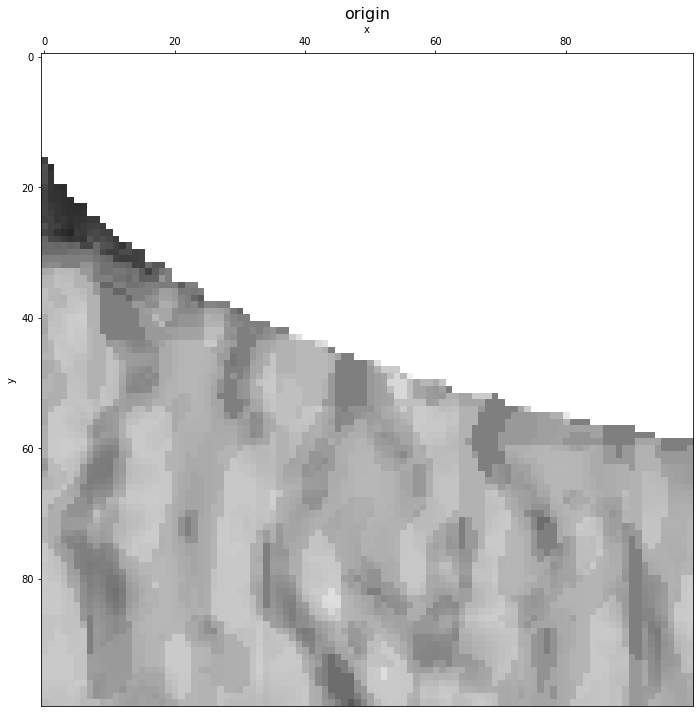

In [54]:
# in case your original image was in color
draw(im)

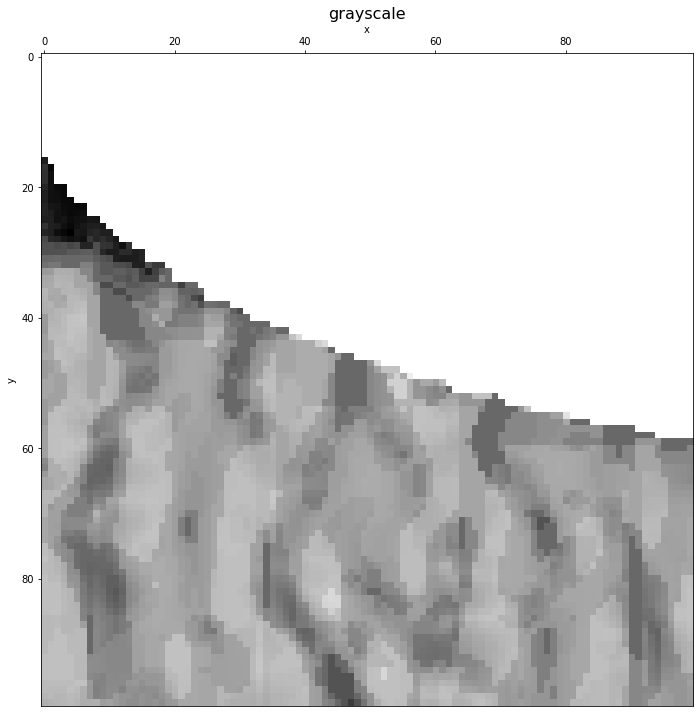

In [55]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
draw_mpl(gray, 'grayscale')

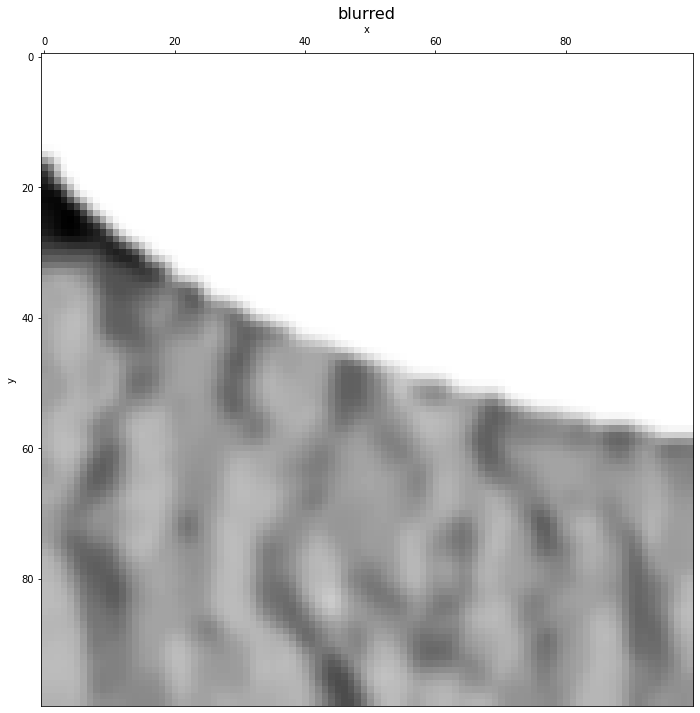

In [56]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
draw_mpl(blurred, 'blurred')

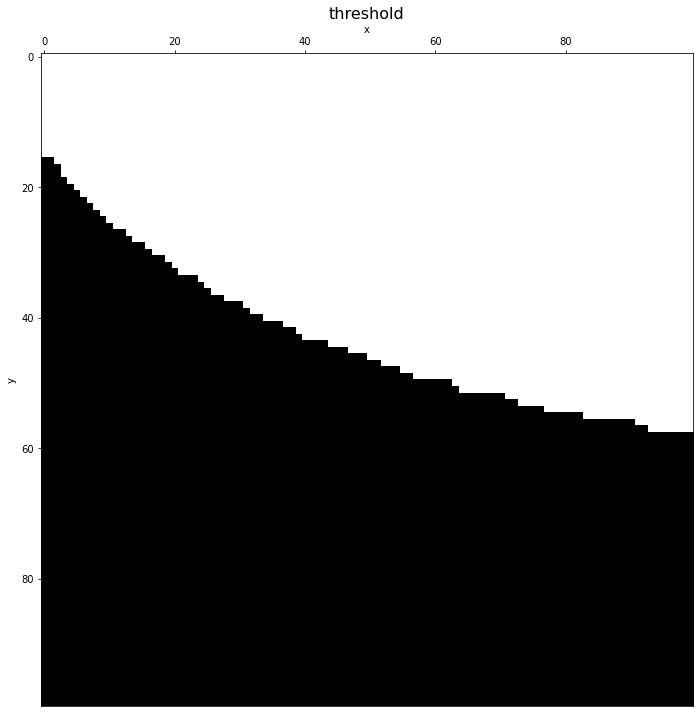

In [57]:
thresh = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)[1]
draw_mpl(thresh, 'threshold')

In [58]:
cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

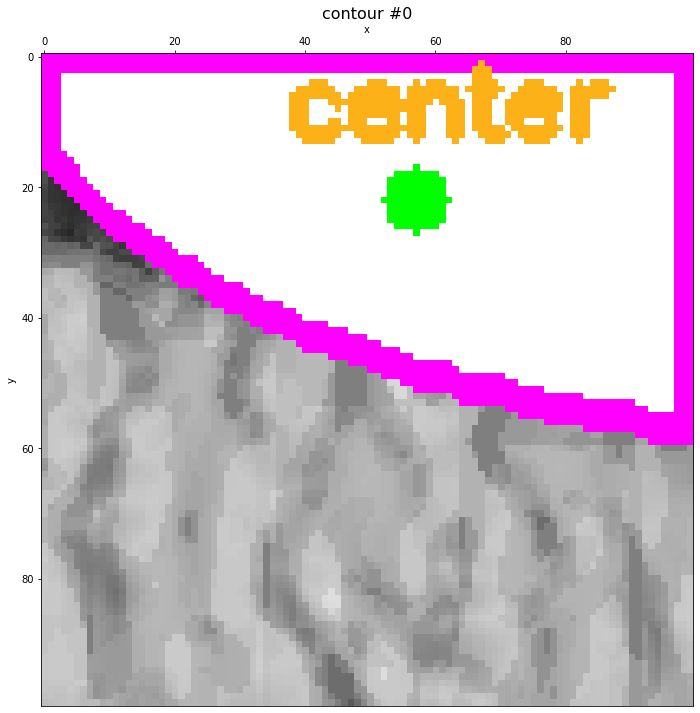

In [59]:
res = im.copy()
# in case you will work with only on channel
# res = cv2.cvtColor(res, cv2.COLOR_GRAY2RGB)
for i, cnt in enumerate(cnts):
    # compute the center of the contour
    M = cv2.moments(cnt)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    # draw the contour and center of the shape on the image
    res = cv2.drawContours(res, [cnt], -1, (255, 0, 255), 3)
    res = cv2.circle(res, (cX, cY), 5, (0, 255, 0), -1)
    res = cv2.putText(res, "center", (cX - 20, cY - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (251, 177, 23), 2)
    # show the image
    draw_mpl(res, f'contour #{i}')

In [62]:
height, width = gray.shape

In [65]:
fl1,fl2,fl3,fl4 = (0,0),(0,height),(width,height),(width,0)
full_img_contour = np.array([[fl1],[fl2],[fl3],[fl4]])
full_img_area = cv2.contourArea(full_img_contour)
total_c_area = sum([cv2.contourArea(cnt) for cnt in cnts])
#==============================================
print('Contour method')
print(f'{height} x {width} image')
print(f'Total image area: {full_img_area}')
print(f'All white contours area: {total_c_area}')
w_percentage = 100*total_c_area/full_img_area
print(f'{w_percentage:.2f}% white')

Contour method
100 x 100 image
Total image area: 10000.0
All white contours area: 4239.5
42.40% white


In [66]:
tp = height * width
n_white_pix = np.sum(thresh == 255)
#==============================================
print('Pixel method')
print(f'{height} x {width} image')
print(f'Total pixel number: {tp}')
print(f'Number of white pixels: {n_white_pix}')
percentage = 100*n_white_pix/tp
print(f'{percentage:.2f}% white')

Pixel method
100 x 100 image
Total pixel number: 10000
Number of white pixels: 4376
43.76% white
